<h1 style="text-align: center;">Experiment 7</h1>

<h4> Aim : To perform Navie Bayes and K-NN (k-nearest neighbor) classification using sklearn
package in python </h4>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('Loan.csv')

In [3]:
train_df = train_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


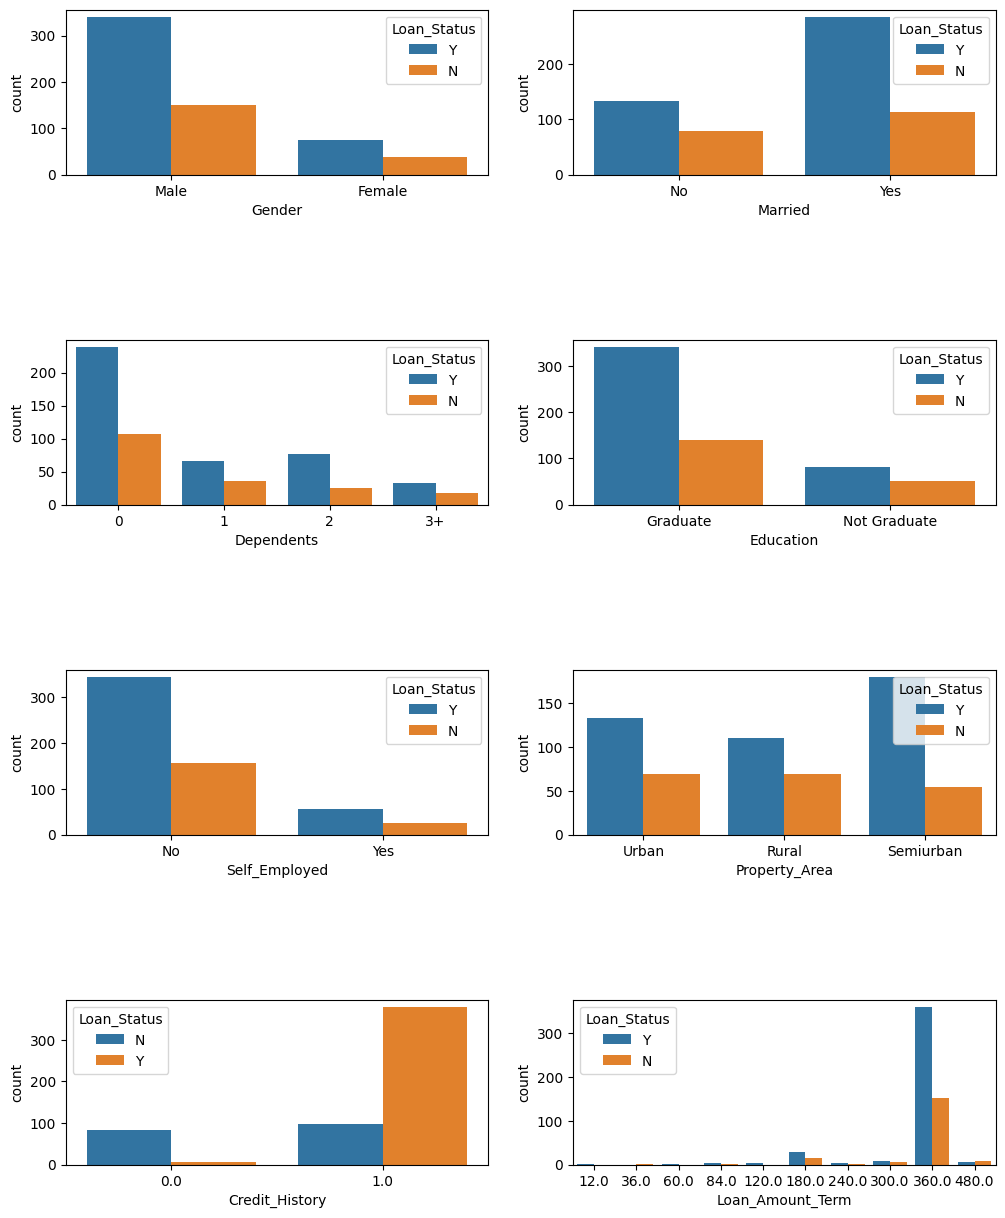

In [4]:

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [5]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


In [6]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [7]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)



Navie Bayes

In [8]:
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred_nb))
print("Training Data F1 Score ", f1_score(y_train,y_pred_nb))
print("Confusion Matrix on Train Data \n",confusion_matrix(y_train,y_pred_nb))


Training Data Set Accuracy:  0.7832167832167832
Training Data F1 Score  0.8580152671755725
Confusion Matrix on Train Data 
 [[ 55  79]
 [ 14 281]]


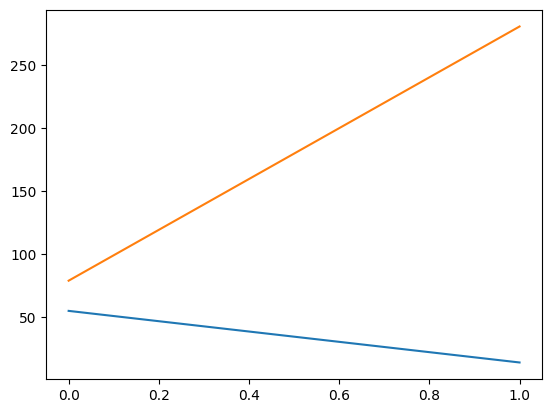

In [9]:
plt.plot(confusion_matrix(y_train,y_pred_nb))

K-NN (k-nearest neighbor)

In [10]:
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred_knn))
print("Training Data F1 Score ", f1_score(y_train,y_pred_knn))
print("Confusion Matrix on Train Data \n",confusion_matrix(y_train,y_pred_knn))


Training Data Set Accuracy:  0.7342657342657343
Training Data F1 Score  0.8251533742331288
Confusion Matrix on Train Data 
 [[ 46  88]
 [ 26 269]]
